In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../Dataset/Travel.csv')

In [6]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [10]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [11]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [12]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
for features in features_with_na:
  print(features,np.round(df[features].isnull().mean()*100,5), '%missingvalues')

Age 4.62357 %missingvalues
TypeofContact 0.51146 %missingvalues
DurationOfPitch 5.13502 %missingvalues
NumberOfFollowups 0.92062 %missingvalues
PreferredPropertyStar 0.53191 %missingvalues
NumberOfTrips 2.86416 %missingvalues
NumberOfChildrenVisiting 1.35025 %missingvalues
MonthlyIncome 4.76678 %missingvalues


In [13]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [14]:
#Age
df.Age.fillna(df.Age.median(),inplace=True)

#Type of Contact
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

#Duration of Pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

#Number of Followup as it is Discrete feature
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

#Preferred Property Star
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

#Number of Trips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

#Number of Children Visiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

#Monthly Income
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [15]:
df.drop('CustomerID', inplace=True, axis=1)

In [16]:
#Create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'], axis=1,inplace=True)

In [17]:
#Get all numeric feature
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Feature: ',len(num_features))

#Categorical Features
cat_features = [feature for feature in df.columns if df[feature].dtype=='O']
print('Num of Categorical Feature: ',len(cat_features))

#Discrete Features
dis_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Feature: ',len(dis_features))

#Continuous Features
cont_features = [feature for feature in num_features if feature not in dis_features]
print('Num of Continuous Feature: ',len(cont_features))

Num of Numerical Feature:  12
Num of Categorical Feature:  6
Num of Discrete Feature:  9
Num of Continuous Feature:  3


In [18]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [19]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [21]:
#Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [22]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [23]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [25]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)

  #Make Predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #Training set performance
  model_train_accuracy = accuracy_score(y_train,y_train_pred)
  model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
  model_train_precision = precision_score(y_train,y_train_pred)
  model_train_recall = recall_score(y_train,y_train_pred)
  model_train_rocauc = roc_auc_score(y_train,y_train_pred)

  #Test set performance
  model_test_accuracy = accuracy_score(y_test,y_test_pred)
  model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
  model_test_precision = precision_score(y_test,y_test_pred)
  model_test_recall = recall_score(y_test,y_test_pred)
  model_test_rocauc = roc_auc_score(y_test,y_test_pred)

  print(list(models.keys())[i])

  print('Model Performance for Training Set')

  print('- Accuracy: {:.4f}'.format(model_train_accuracy))
  print('- F1: {:.4f}'.format(model_train_f1))
  print('- Precision: {:.4f}'.format(model_train_precision))
  print('- Recall: {:.4f}'.format(model_train_recall))
  print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc))

  print('-----------------------------------')

  print('Model Performance for Test Set')

  print('- Accuracy: {:.4f}'.format(model_test_accuracy))
  print('- F1: {:.4f}'.format(model_test_f1))
  print('- Precision: {:.4f}'.format(model_test_precision))
  print('- Recall: {:.4f}'.format(model_test_recall))
  print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc))

  print('='*35)

Logistic Regression
Model Performance for Training Set
- Accuracy: 0.8460
- F1: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- ROC AUC Score: 0.6368
-----------------------------------
Model Performance for Test Set
- Accuracy: 0.8364
- F1: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- ROC AUC Score: 0.6307
Decision Tree
Model Performance for Training Set
- Accuracy: 1.0000
- F1: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model Performance for Test Set
- Accuracy: 0.9141
- F1: 0.9136
- Precision: 0.7892
- Recall: 0.7644
- ROC AUC Score: 0.8574
Random Forest
Model Performance for Training Set
- Accuracy: 1.0000
- F1: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model Performance for Test Set
- Accuracy: 0.9274
- F1: 0.9216
- Precision: 0.9688
- Recall: 0.6492
- ROC AUC Score: 0.8221
Gradient Boost
Model Performance for Training Set
- Accuracy: 0.8939
- F1: 0.8819
- Prec

In [26]:
#hyperparameter Tuning
adaboost_param = {
    'n_estimators':[50,60,70,80,90],
    'algorithm':['SAMME','SAMME.R']
}

In [27]:
adaboost_param

{'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}

In [28]:
#Models list for Hyperparameter Tuning
randomcv_models = [
                    ('AdaBoost',AdaBoostClassifier(),adaboost_param)
                  ]

In [29]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}
for name,model,params in randomcv_models:
  rv = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
  rv.fit(X_train,y_train)
  model_params[name] = rv.best_params_

for model_name in model_params:
  print(f'---------- Best Params for {model_name} ----------')
  print(model_params[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s
[CV] END ...................

/Users/rishaan/miniforge3/envs/tensorflow-keras/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/rishaan/miniforge3/envs/tensorflow-keras/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/rishaan/miniforge3/envs/tensorflow-keras/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/rishaan/miniforge3/envs/tensorflow-keras/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (

[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.1s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.2s


/Users/rishaan/miniforge3/envs/tensorflow-keras/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/rishaan/miniforge3/envs/tensorflow-keras/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/rishaan/miniforge3/envs/tensorflow-keras/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=   0.2s
---------- Best Params for AdaBoost ----------
{'n_estimators': 80, 'algorithm': 'SAMME'}


In [30]:
models = {
    'AdaBoost': AdaBoostClassifier(n_estimators=80,algorithm='SAMME')
}

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)

  #Make Predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #Training set performance
  model_train_accuracy = accuracy_score(y_train,y_train_pred)
  model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
  model_train_precision = precision_score(y_train,y_train_pred)
  model_train_recall = recall_score(y_train,y_train_pred)
  model_train_rocauc = roc_auc_score(y_train,y_train_pred)

  #Test set performance
  model_test_accuracy = accuracy_score(y_test,y_test_pred)
  model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
  model_test_precision = precision_score(y_test,y_test_pred)
  model_test_recall = recall_score(y_test,y_test_pred)
  model_test_rocauc = roc_auc_score(y_test,y_test_pred)

  print(list(models.keys())[i])

  print('Model Performance for Training Set')

  print('- Accuracy: {:.4f}'.format(model_train_accuracy))
  print('- F1: {:.4f}'.format(model_train_f1))
  print('- Precision: {:.4f}'.format(model_train_precision))
  print('- Recall: {:.4f}'.format(model_train_recall))
  print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc))

  print('-----------------------------------')

  print('Model Performance for Test Set')

  print('- Accuracy: {:.4f}'.format(model_test_accuracy))
  print('- F1: {:.4f}'.format(model_test_f1))
  print('- Precision: {:.4f}'.format(model_test_precision))
  print('- Recall: {:.4f}'.format(model_test_recall))
  print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc))

  print('='*35)

AdaBoost
Model Performance for Training Set
- Accuracy: 0.8465
- F1: 0.8132
- Precision: 0.7699
- Recall: 0.2524
- ROC AUC Score: 0.6176
-----------------------------------
Model Performance for Test Set
- Accuracy: 0.8364
- F1: 0.7977
- Precision: 0.7818
- Recall: 0.2251
- ROC AUC Score: 0.6049


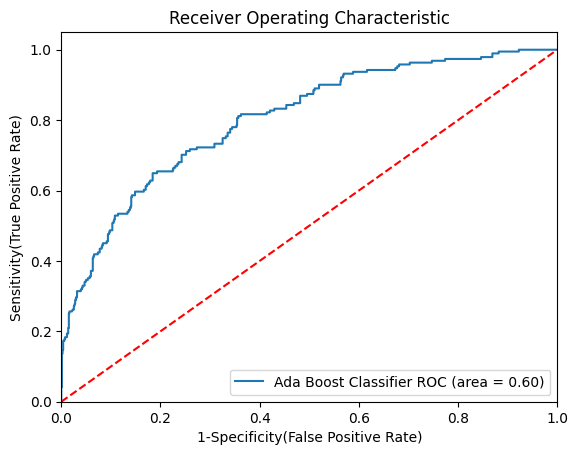

In [31]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Ada Boost Classifier',
    'model': AdaBoostClassifier(n_estimators=80,algorithm='SAMME'),
    'auc':  0.6049
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()